Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

Create a dataframe named "data" from the given datafile and print it's head

In [2]:
data=pd.read_csv('datasets_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [3]:
print(data.shape)
print()
print(data.ndim)
print()
print(data.describe())
print()
print(data.info())

(1338, 7)

2

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float

Check if there are missing values. If yes, handle them.

In [4]:
print(data.isnull().sum())
print(data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

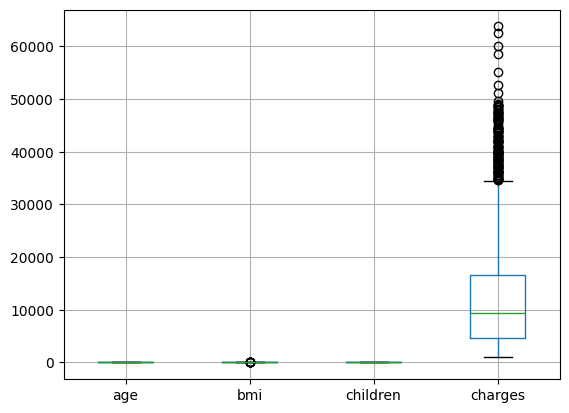

In [5]:
data.boxplot()
plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

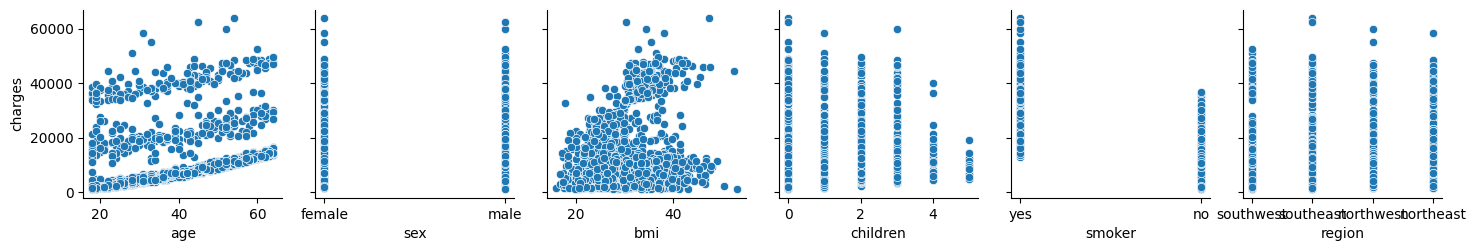

In [6]:
sns.pairplot(data,x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],y_vars=['charges'],kind='scatter');
plt.show()

Create X and Y

In [7]:
X=data.loc[:,['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
Y=data.loc[:,'charges']
#data.columns

Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

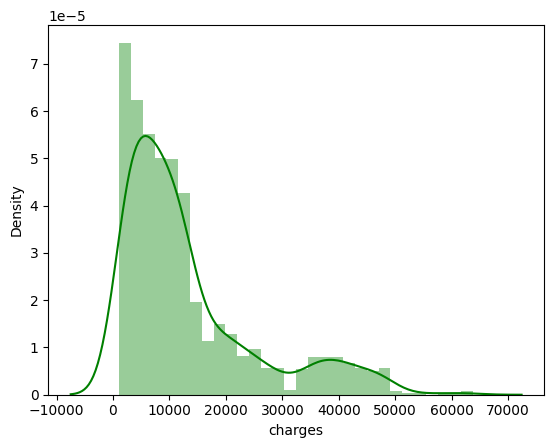

In [8]:
sns.distplot(Y,color='green')
plt.show()

In [9]:
Y_log=np.log(Y)

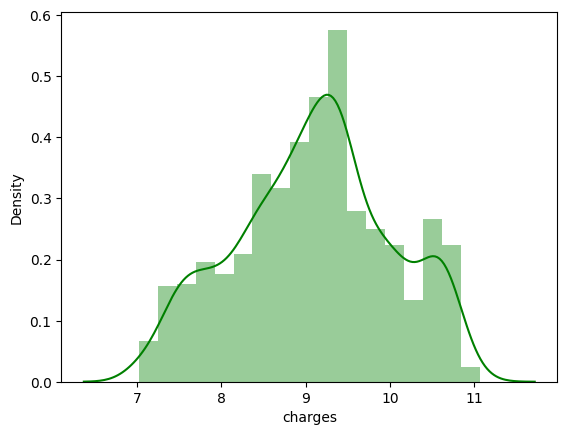

In [10]:
sns.distplot(Y_log,color='green')
plt.show()

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3<br><br>
Hint: df.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [11]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
data['sex'].replace({"female":0,"male":1},inplace=True)
data['smoker'].replace({"no":0,"yes":1},inplace=True)
data['region'].replace({'northeast':0,'northwest':1,'southeast':2,'southwest':3},inplace=True)

In [13]:
X['sex'].replace({"female":0,"male":1},inplace=True)
X['smoker'].replace({"no":0,"yes":1},inplace=True)
X['region'].replace({'northeast':0,'northwest':1,'southeast':2,'southwest':3},inplace=True)

In [14]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

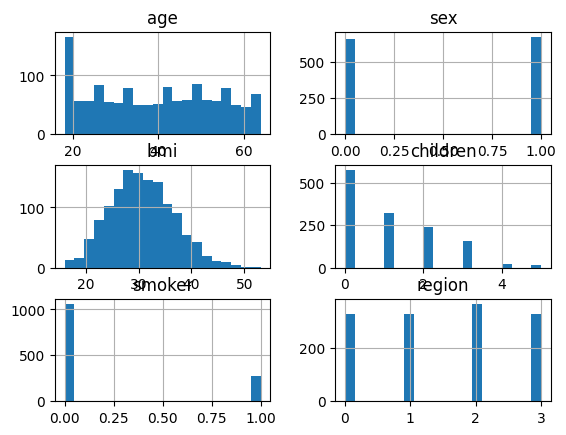

In [15]:
X.hist(bins=20)
plt.show()

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


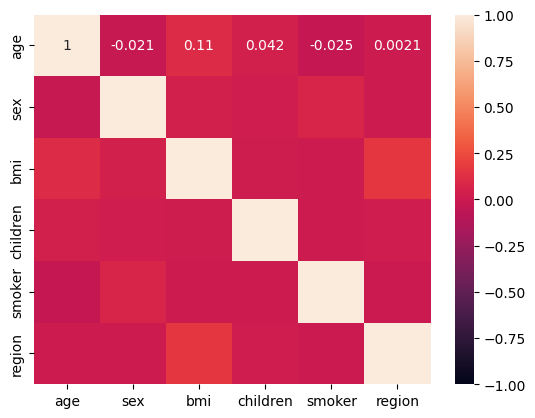

In [16]:
corr_df=X.corr(method='pearson')
print(corr_df)
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_log,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


Build a base Linear Regression model using sklearn.

In [19]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

6.998797622591984
[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [20]:
print(list(zip(X.columns,lm.coef_)))

[('age', 0.03498834149076493), ('sex', -0.07113220005343099), ('bmi', 0.012591262605123985), ('children', 0.09962976583044053), ('smoker', 1.5693443019666675), ('region', -0.03889151819958847)]


Predict using the model.

In [21]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 8.90264566  8.55800249  9.44206862  9.37109228  8.30231857  8.93127398
  9.22860018  9.62770497  8.96169962 10.524292    8.12183109  8.270934
  8.75991467  9.14967223  9.23002002  9.36183759  8.32332991  9.81527793
  9.18395253 10.20908992 10.5308626   8.06726747  7.95992684  8.77128514
  8.43374205  9.41895434  9.01687327  9.41850025  8.42170066 10.20084299
  7.72507636 10.38861159  8.89576619  8.94511958  8.45447782  8.89057139
  9.43604078  9.09248396  9.09271164  8.89473802  9.58926813  9.15682789
  8.54484462  8.99761391  7.99767708  8.81979395  8.91337357 10.61798009
  9.30298176  9.24221911 10.01078002  8.31758485  8.90942155  9.62809789
  9.09900057  9.38167738  9.30538021  8.63050675  8.707771   10.70371838
  7.87802912 10.61635976 11.07322819  7.95757539  9.99650111  8.87336923
  8.47709653  8.90772216  8.86749958  8.92965431  8.81908517  7.95741791
  8.85051652  8.89426488  8.97913786  9.33234154  8.55732546  8.82884226
  7.81072893  9.33028012  9.26333526  9.18682528  9.7

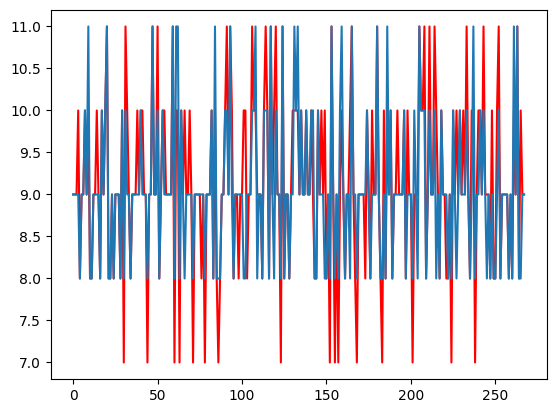

In [22]:
new_df=pd.DataFrame()
new_df=X_test.copy()
new_df['Actual']=Y_test.round()
new_df['Predicted']=Y_pred.round()
new_df=new_df.reset_index().drop("index", axis=1)
new_df
new_df["Actual"].plot(color='red')
new_df["Predicted"].plot()
plt.show()

Evaluate the model.

In [23]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624696
RMSE: 0.4882327185684707
Adj R-square: 0.703623414730595


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [24]:
from sklearn.linear_model import Ridge
ri=Ridge()
ri.fit(X_train,Y_train)
print(ri.intercept_)
print(ri.coef_)

7.000415207061313
[ 0.03498462 -0.07025584  0.01259184  0.09952118  1.5602262  -0.03886915]


In [25]:
Y_pred=ri.predict(X_test)
print(Y_pred)

[ 8.90383819  8.559524    9.44432297  9.37254216  8.30386562  8.93264867
  9.23044255  9.62008163  8.96299492 10.51642592  8.12406577  8.27247141
  8.76226365  9.15083063  9.23137113  9.36326822  8.32481017  9.81730179
  9.18544459 10.20223939 10.52398423  8.06885693  7.96149259  8.77266848
  8.43509829  9.42039288  9.01907481  9.41962597  8.42309111 10.19404856
  7.7275781  10.38171259  8.89727941  8.94724544  8.45682241  8.89191125
  9.43834376  9.09487269  9.094159    8.896934    9.59071732  9.15895566
  8.54636553  8.9990888   8.00017241  8.82120653  8.91559517 10.61089538
  9.30527048  9.24366554 10.00310992  8.31916204  8.91172601  9.6293009
  9.10136015  9.38400733  9.30671351  8.63283569  8.71008752 10.69579563
  7.88047073 10.60941801 11.06553125  7.96004765  9.98958379  8.87490557
  8.47930489  8.90988639  8.86892784  8.93106947  8.82055725  7.9597983
  8.85191167  8.89643381  8.98053645  9.33357888  8.55887107  8.83039251
  7.8131863   9.33143901  9.26536007  9.18908637  9.7

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7052731948166417
RMSE: 0.48796809703937566
Adj R-square: 0.7039445991509017


In [27]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train,Y_train)
print(las.intercept_)
print(las.coef_)

7.895875452206857
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [28]:
Y_pred=las.predict(X_test)
print(Y_pred)

[9.02181452 8.99138374 9.6912918  9.75215338 8.77836824 9.14353766
 9.26526081 8.50449116 9.23483002 9.20439923 8.53492195 8.68707588
 9.20439923 9.14353766 9.35655316 9.72172259 8.65664509 9.81301495
 9.59999945 8.99138374 9.23483002 8.47406038 8.44362959 9.05224531
 8.74793745 9.6912918  9.23483002 9.53913788 8.68707588 9.08267609
 8.47406038 9.08267609 9.26526081 9.23483002 8.77836824 8.96095295
 9.78258416 9.47827631 9.41741473 9.23483002 9.81301495 9.41741473
 8.99138374 9.23483002 8.44362959 9.17396845 9.32612238 9.14353766
 9.6912918  9.59999945 8.59578352 8.74793745 9.26526081 9.66086102
 9.50870709 9.75215338 9.47827631 9.05224531 9.14353766 9.20439923
 8.44362959 9.38698395 9.81301495 8.56535274 8.80879902 9.26526081
 8.77836824 9.14353766 9.23483002 9.32612238 9.20439923 8.44362959
 9.14353766 9.11310688 9.29569159 9.38698395 8.99138374 9.17396845
 8.47406038 9.32612238 9.38698395 9.44784552 8.44362959 8.71750666
 9.47827631 8.68707588 8.44362959 8.50449116 8.96095295 9.3869

In [29]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [30]:
new_df=pd.DataFrame()
new_df=X_train.copy()
new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>

In [31]:
import statsmodels.formula.api as sm
# create a fitted model with all 6 features
lm_model = sm.ols(formula='charges ~ age + sex + bmi + children + smoker + region', 
                  data=new_df).fit()
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    6.998798
age          0.034988
sex         -0.071132
bmi          0.012591
children     0.099630
smoker       1.569344
region      -0.038892
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.4
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:46:54   Log-Likelihood:                -620.60
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

Predict using the model. Evaluate the model.

In [32]:
Y_pred=lm_model.predict(X_test)

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624696
RMSE: 0.4882327185684707
Adj R-square: 0.703623414730595


Write down your conclusion as to which is the final model that you would go with along with the reasons.

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [33]:
X_test_sample=pd.DataFrame({"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]})
X_test_sample

,age,sex,bmi,children,smoker,region
0,56,1,19.950,0,1,0
1,51,0,18.050,0,0,1
2,31,1,34.390,3,1,1
3,64,1,25.600,2,0,3
4,44,0,23.980,2,0,2
5,43,1,32.600,2,0,3
6,56,1,33.725,0,0,1


In [34]:
Y_pred=ri.predict(X_test_sample)
print(Y_pred)

[10.70073159  8.97304448 10.26763652  9.57396116  8.96299492  8.92742692
  9.27508878]


In [35]:
Y_pred=np.exp(Y_pred)

The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

Save the predicted values along with the observations into an excel file.

In [36]:
X_test_sample.to_excel("Charge Prediction.xlsx",header=True,index=True)
X_test_sample['Predicted']=Y_pred
X_test_sample['Actual values']=(22412.6485,9644.2525,38746.3551,14988.432,8211.1002,7441.501,10976.24575)

In [37]:
X_test_sample

,age,sex,bmi,children,smoker,region,Predicted,Actual values
0,56,1,19.950,0,1,0,44388.317312,22412.64850
1,51,0,18.050,0,0,1,7887.578626,9644.25250
2,31,1,34.390,3,1,1,28785.772190,38746.35510
3,64,1,25.600,2,0,3,14385.286001,14988.43200
4,44,0,23.980,2,0,2,7808.708904,8211.10020
5,43,1,32.600,2,0,3,7535.850099,7441.50100
6,56,1,33.725,0,0,1,10668.905671,10976.24575
